## Problem Statement

Walmart operates multiple stores across different regions, each with varying sales performance influenced by time, holidays, promotions, and economic conditions. 
Management wants to understand:

- How sales are performing over time
- Which stores contribute the most and least to revenue
- Whether holidays and promotions significantly impact sales
- How external economic factors affect weekly sales
- How sales patterns can be used for better forecasting and planning

The goal of this project is to analyze Walmart’s historical weekly sales data and provide actionable business insights to improve inventory planning, promotional strategies, and demand forecasting.


## Dataset Description

The dataset contains weekly sales data for Walmart stores at the department level. Each record represents the weekly sales of a specific department within a store.

**Key Columns:**
- Store: Unique store identifier
- Dept: Department identifier
- Date: Week of sales
- Weekly_Sales: Total sales for the given week
- IsHoliday: Indicates whether the week includes a major holiday
- MarkDown1–5: Promotional discount amounts
- External economic indicators: Temperature, Fuel_Price, CPI, Unemployment 


## Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load and check

In [3]:
sales = pd.read_csv('Dataset/Walmart Sales Forecast.csv')
features = pd.read_csv('Dataset/features - Walmart Sales Forecast.csv')

df = sales.merge(features,on=["Store","Date","IsHoliday"],how="left")

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
print(df.shape)
print(df.columns)

(421570, 14)
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [6]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [8]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

In [9]:
df= df.drop_duplicates()

In [10]:
df['Date'] =pd.to_datetime(df['Date'])
df = df[df['Weekly_Sales'] >= 0].copy()

## EDA

In [11]:
# Time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


- ## How are overall sales performing over time?

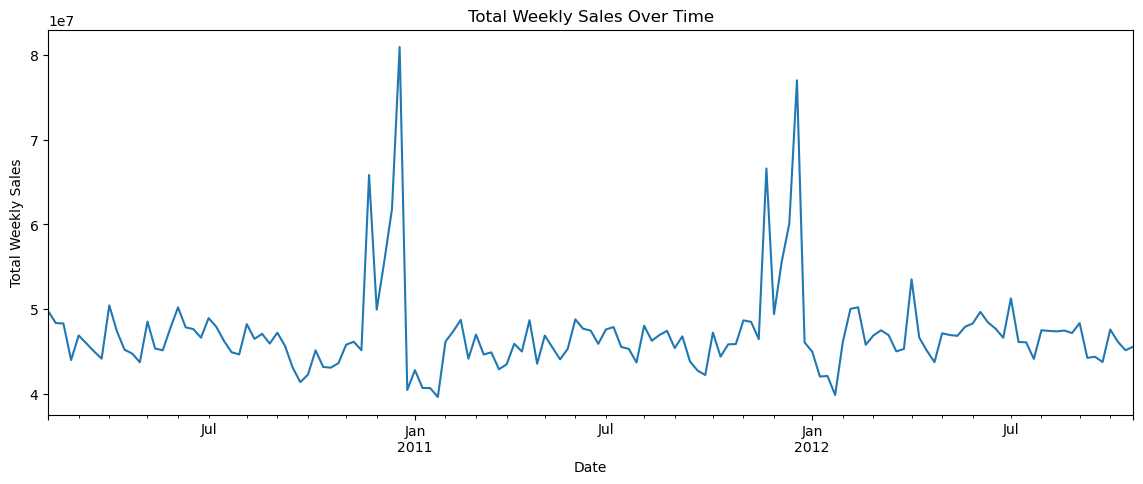

In [12]:
weekly_sales  = df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.plot(figsize=(14,5))
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

Weekly sales are mostly stable throughout the year. However, there are clear spikes in sales during certain periods, mainly around major holidays like Thanksgiving and Christmas. After these peaks, sales return to normal levels, showing that the increase is temporary and driven by holiday demand rather than long-term growth

- ## Which stores perform best and worst?

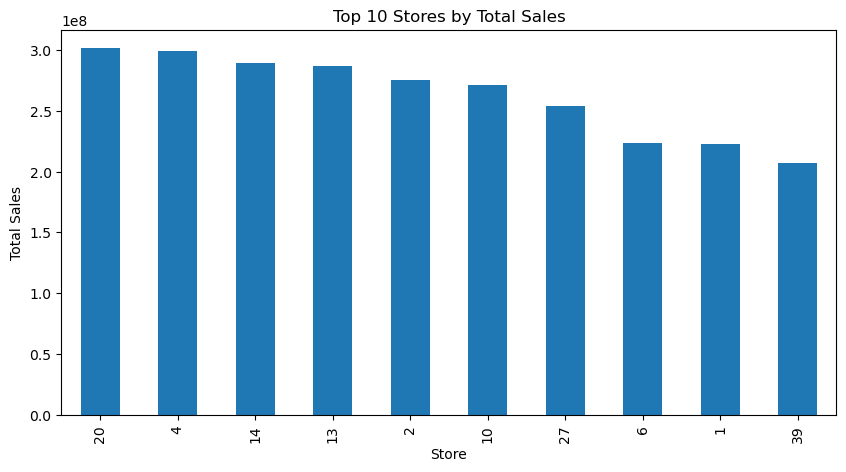

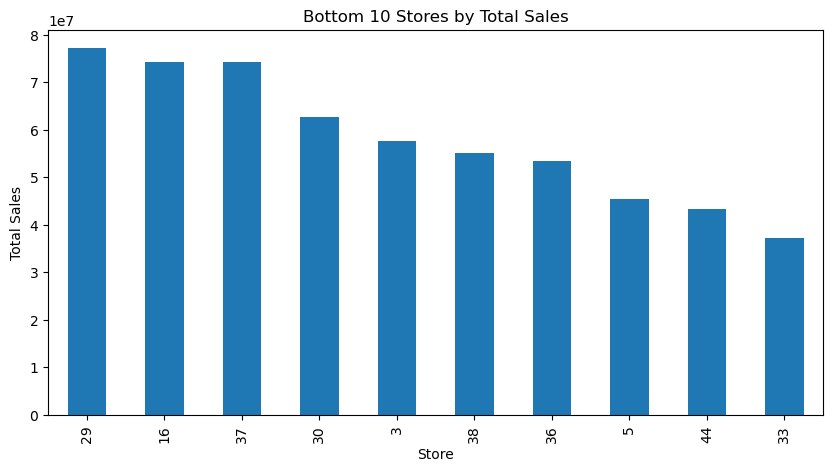

In [13]:

store_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top10 = store_sales.head(10)
bottom10 = store_sales.tail(10)
# best performing stores
plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()
# worst performing stores
plt.figure(figsize=(10,5))
bottom10.plot(kind='bar')
plt.title("Bottom 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

Sales vary a lot across stores. A few stores, such as Store 20, Store 4, Store 14, and Store 13, generate the highest sales and perform the best.

On the other hand, Store 33, Store 44, Store 5, and Store 36 have the lowest sales and are the weakest performers. This shows that only a small number of stores contribute most of the total revenue.

- ### Do holidays increase sales

IsHoliday
Holiday Period    17092.566220
Regular Period    15949.958317
Name: Weekly_Sales, dtype: float64


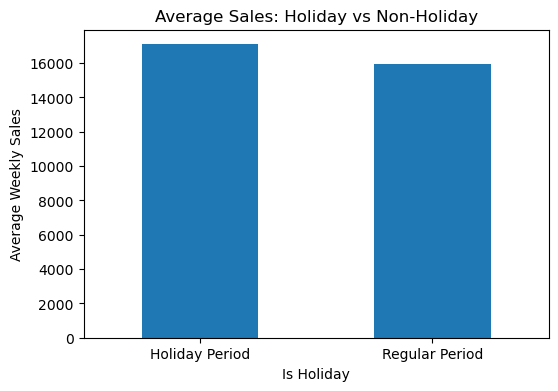

In [14]:
df['IsHoliday'] = df['IsHoliday'].replace({
    True: 'Holiday Period',
    False: 'Regular Period'
})
holiday_sales= df.groupby('IsHoliday')['Weekly_Sales'].mean()
print(holiday_sales)
plt.figure(figsize=(6,4))
holiday_sales.plot(kind='bar')
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday")
plt.xticks(rotation=0)
plt.ylabel("Average Weekly Sales")
plt.show()


The bar plot shows that holiday weeks sell only a little more than non-holiday weeks:
- Holiday weeks: about $15,950

- Regular weeks: about $17,093

So it can be seen that most holidays don’t boost weekly sales much on average. Only big holidays like Christmas or Thanksgiving cause big spikes.

- ### Is there seasonality in sales?

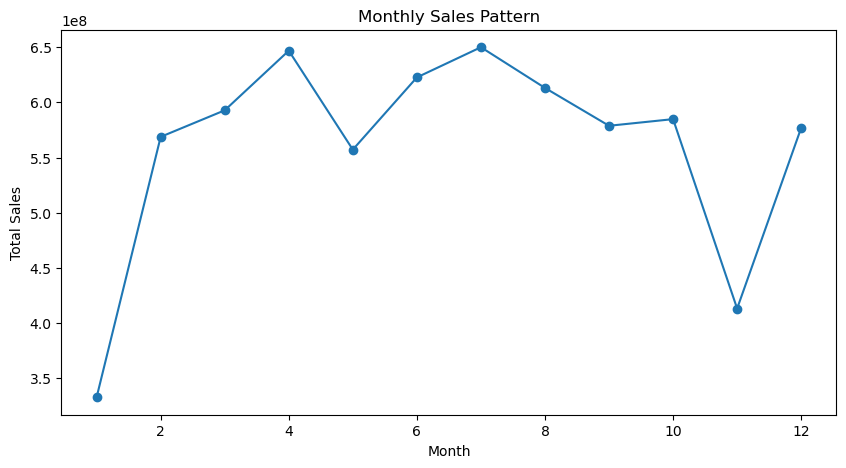

In [15]:
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Pattern")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Sales follow a seasonal pattern, with stronger performance in the middle and end of the year and weaker sales at the beginning and around November.

- ## Do promotions (MarkDowns) affect sales?

Total_MarkDown
No Promo    15918.945543
Promo       16229.073011
Name: Weekly_Sales, dtype: float64


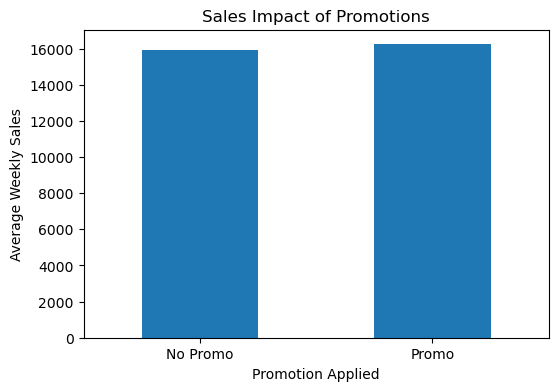

In [16]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)

promo_sales = df.groupby(df['Total_MarkDown'] > 0)['Weekly_Sales'].mean()
label_mapping = {True:'Promo',False:'No Promo'}
promo_sales.index = promo_sales.index.map(label_mapping)

print(promo_sales)
plt.figure(figsize=(6,4))
promo_sales.plot(kind='bar')
plt.title("Sales Impact of Promotions")
plt.xlabel("Promotion Applied")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=0)
plt.show()


No promotion: average weekly sales are about $15,919

With promotion: average weekly sales are about $16,229

That’s an increase of about 310, which is only a modest lift.

Promotions slightly increase weekly sales, but they do not create a big jump overall. This suggests promotions help a little, but their effect is limited when averaged across all products and weeks.

- ## Do economic factors affect sales?

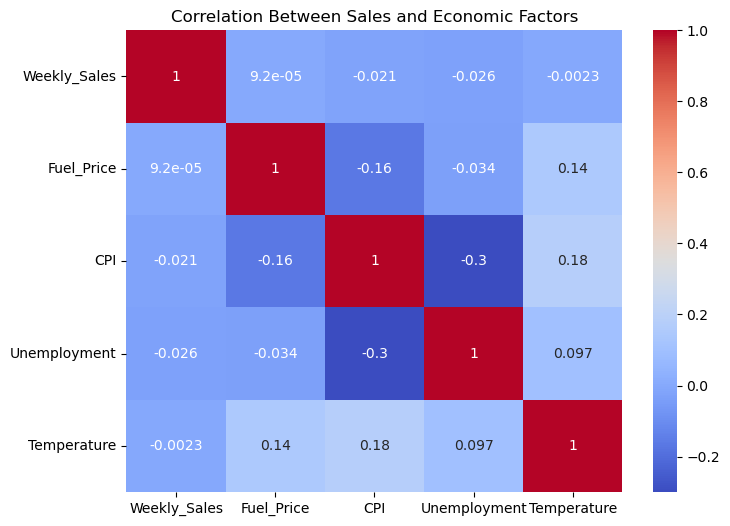

In [17]:
# economic factors 
corr = df[['Weekly_Sales','Fuel_Price','CPI','Unemployment','Temperature']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales and Economic Factors")
plt.show()


Economic factors show minimal influence on weekly sales.
The correlations between weekly sales and fuel price, CPI, unemployment, and temperature are all very small. This means changes in these economic factors do not strongly affect weekly sales.

Conclusion:
Weekly sales are mostly influenced by seasonality, holidays, and store or department factors, not by short-term economic changes.

- ## Are there unstable or risky stores?

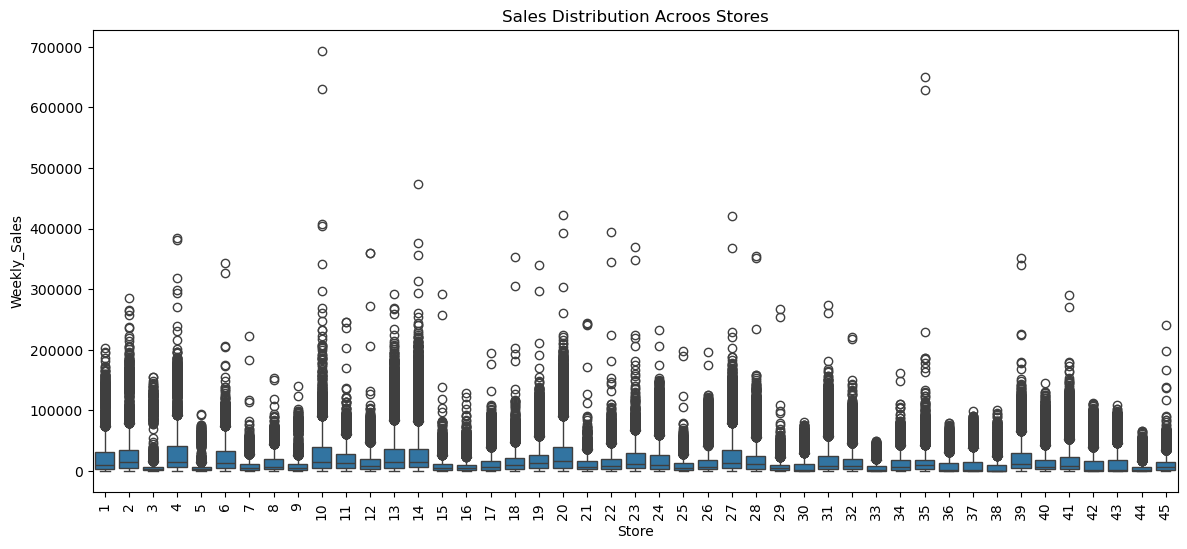

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Store',y='Weekly_Sales',data=df)
plt.xticks(rotation= 90)
plt.title("Sales Distribution Acroos Stores")
plt.show()

Yes, there are definitely stores that show instability and risk.

**Most Unstable (Unpredictable Spikes):**  
- **Store 10** is the most unstable. It usually has low sales but shows extreme outlier spikes reaching nearly 700,000, the highest on the chart.  
- **Store 35** is also highly unpredictable, with sales spikes above 600,000 despite low normal sales.  
- **Store 23** and **Store 13** also show large and unexpected jumps compared to their average sales.

**Risky (Consistently Low Sales):**  
- **Store 33** appears the riskiest, with consistently very low sales and almost no high-performing weeks.  
- **Store 5**, **Store 9**, and **Store 44** also perform poorly, showing limited growth and low sales potential.

**Summary:**  
Stores with extreme spikes are unstable and hard to predict, while stores with consistently low sales are risky due to poor performance.


## Key Business Insights

- Sales exhibit strong seasonality, with peaks during the last months of the year.
- A small number of stores contribute a large portion of total revenue.
- Holiday weeks does not significantly outperforms non-holiday weeks.
- Promotional markdowns lead to a small increase in sales, but their overall impact is limited.
- Economic indicators affect sales moderately but are not primary drivers.
- Some stores show extreme volatility or consistently weak performance.


## Business Recommendations

- Increase inventory levels before major holidays to meet demand.
- Focus improvement strategies on low-performing stores
- Monitor unstable stores closely to reduce inventory risks.
- Use seasonality patterns for better demand planning
- Evaluate promotion effectiveness at store or department level, not overall



In [21]:
df.to_csv('Dataset/walmart_sales_analysis.csv')